To go from fabry-perot scale to MHz use:
- freq_MHz =  fabry_perot_value * unit_blue (or unit_IR)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
unit_blue = 780/421
unit_IR = 780/1013

blue_au = 727 # blue fabry-perot arbitrary unit
infrared_fp_au = 685.8 # infrared fabry-perot arbitrary unit
depumping_RF_Mhz = 82 # AOM+1 radio-frequency


blue_movement = -2
new_blue = blue_au + blue_movement
infrared_movement = - blue_movement*unit_blue/unit_IR
new_infrared = infrared_fp_au + infrared_movement
new_depumping = depumping_RF_Mhz + infrared_movement

print("new IR : ", new_infrared, "\nnew dep : ", new_depumping, "\nnew lue : ", new_blue)

new IR :  690.612351543943 
new dep :  86.812351543943 
new lue :  725


In [3]:
F2_to_3 = 87.05
F1_to_2 = 51.44
F0_to_1 = 23.74

In [107]:
blue_RF = 106

order -1 depumping:  146.5 
order 0 excitation:  67
F0:  59.769999999999996 
F1:  83.50999999999999 
F2:  134.95 
F3:  222
blue order 0:  106


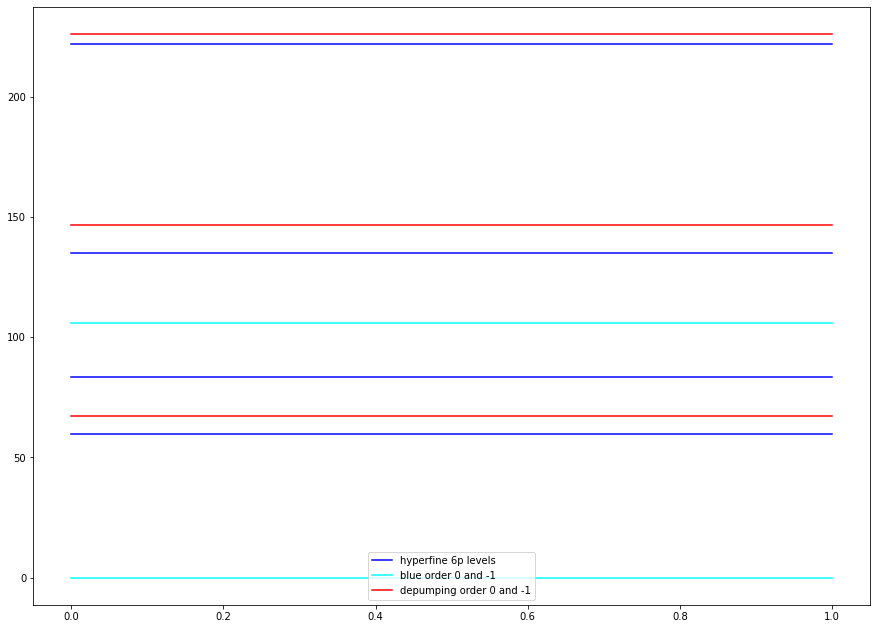

In [149]:
# set the detuning of the IR

detuning_IR = -7

# the excitation IR has the order +1 good coupled with the blue order -1.
# the order zero of the excitation IR is x MHz higher than the order +1.

x = 60
exc_IR_0 = x - detuning_IR
exc_IR_1 = - detuning_IR

# the order zero of the depumping beam is the same of the excitation beam, 
# since the RF sent to the AOM+1 is 80 MHz the order -1 is 80 MHz higher.
depumping_RF = 79.5
dep_IR_0 = x - detuning_IR
dep_IR_1 = x + depumping_RF - detuning_IR

print("order -1 depumping: ", dep_IR_1, "\norder 0 excitation: ", exc_IR_0)

# now here we compute the distance from the blue detuned of the hyperfine 6p levels

detuning_from_F3 = 222
F3 = detuning_from_F3
F2 = F3 - F2_to_3
F1 = F2 - F1_to_2
F0 = F1 - F0_to_1

print("F0: ", F0, "\nF1: ", F1, "\nF2: ", F2, "\nF3: ", F3)

# here is coputed the order 0 of the blue beam

blue_order_0 = blue_RF

print("blue order 0: ", blue_order_0)
plt.figure(figsize=(15, 11))

plt.plot([0,1],[F3, F3], c = "b", label = "hyperfine 6p levels")
plt.plot([0,1],[F2, F2], c = "b")
plt.plot([0,1],[F1, F1], c = "b")
plt.plot([0,1],[F0, F0], c = "b")
plt.plot([0,1],[0, 0], c = "cyan", label = "blue order 0 and -1")
plt.plot([0,1],[blue_order_0, blue_order_0], c = "cyan")
plt.plot([0,1],[dep_IR_0, dep_IR_0], c = "r", label = "depumping order 0 and -1")
plt.plot([0,1],[dep_IR_1, dep_IR_1], c = "r")
plt.plot([0,1],[dep_IR_1+depumping_RF, dep_IR_1+depumping_RF], c = "r")

plt.legend()
plt.show()

In [130]:
def lorentian(delta, ampl=1):
    return ampl/(1+delta**2)

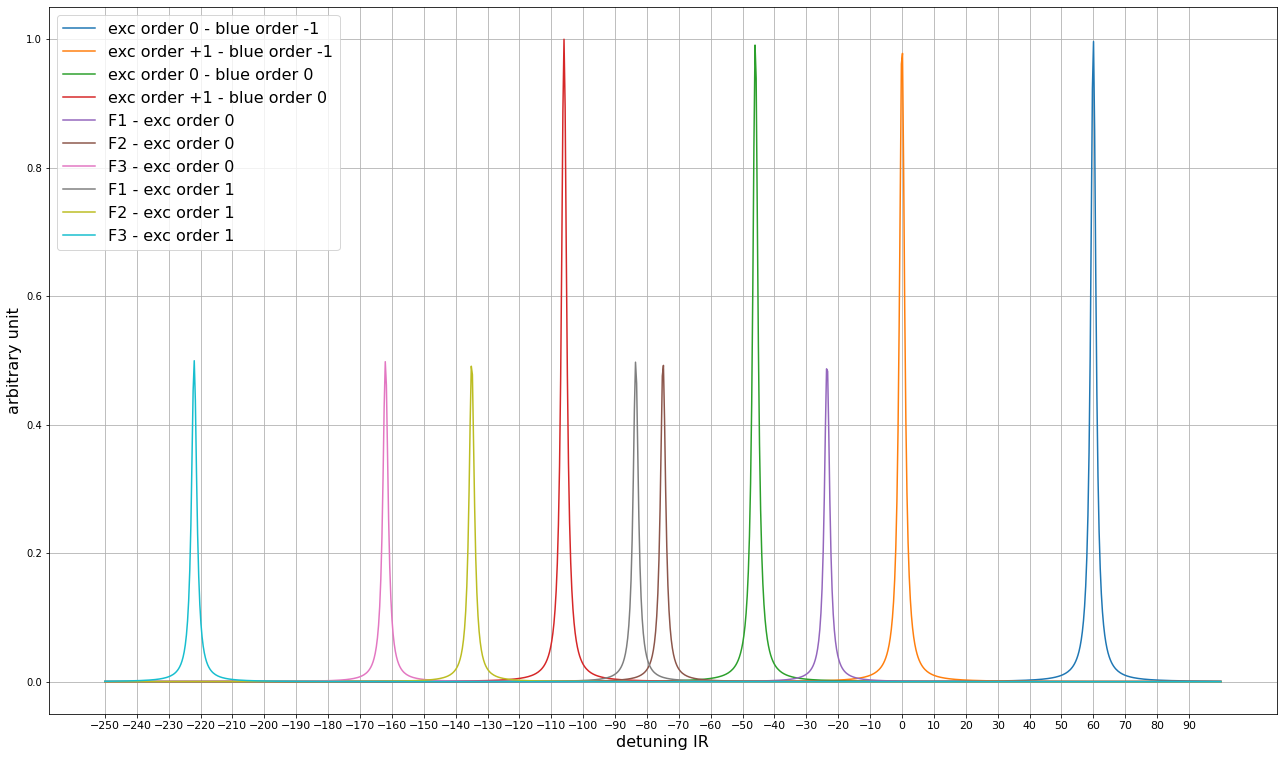

In [168]:
#### excitation

N_points = 1000
min_detuning_IR = -250
max_detuning_IR = 100
detunings = np.linspace(min_detuning_IR, max_detuning_IR, N_points)
labels = [
        "exc order 0 - blue order -1", 
        "exc order +1 - blue order -1", 
        "exc order 0 - blue order 0", 
        "exc order +1 - blue order 0",
        "F1 - exc order 0",
        "F2 - exc order 0",
        "F3 - exc order 0",
        "F1 - exc order 1",
        "F2 - exc order 1",
        "F3 - exc order 1",
]
exc_sim = {}
for label in labels:
    exc_sim[label] = []

for detuning_IR in detunings:
    # the excitation IR has the order +1 good coupled with the blue order -1.
    # the order zero of the excitation IR is x MHz higher than the order +1.

    x = 60
    exc_IR_0 = x - detuning_IR
    exc_IR_1 = - detuning_IR

    # the order zero of the depumping beam is the same of the excitation beam, 
    # since the RF sent to the AOM+1 is 80 MHz the order -1 is 80 MHz higher.

    dep_IR_0 = x - detuning_IR
    dep_IR_1 = x + 79.5 - detuning_IR

    # define the blue radiofrequecy

    blue_RF = 106

    blue_order_0 = blue_RF
    blue_order_1 = 0

    excitations = [
                exc_IR_0-blue_order_1, 
                exc_IR_1-blue_order_1, 
                exc_IR_0-blue_order_0, 
                exc_IR_1-blue_order_0,
                F1-exc_IR_0,
                F2-exc_IR_0,
                F3-exc_IR_0,
                F1-exc_IR_1,
                F2-exc_IR_1,
                F3-exc_IR_1,
                ]

    for label, lasers in zip(labels, excitations):
        if "F" in label:
            exc_sim[label].append(lorentian(lasers, 0.5))
        else:
            exc_sim[label].append(lorentian(lasers, 1))

plt.figure(figsize=(22,13))
for k, label in zip(range(len(exc_sim)), labels):
    plt.plot(detunings, exc_sim[label], label=label)
plt.legend(fontsize=16)
plt.xlabel("detuning IR", fontsize=16)
plt.ylabel("arbitrary unit", fontsize=16)
plt.xticks(np.arange(min_detuning_IR, max_detuning_IR, 10), fontsize=11)
plt.grid()
plt.show()


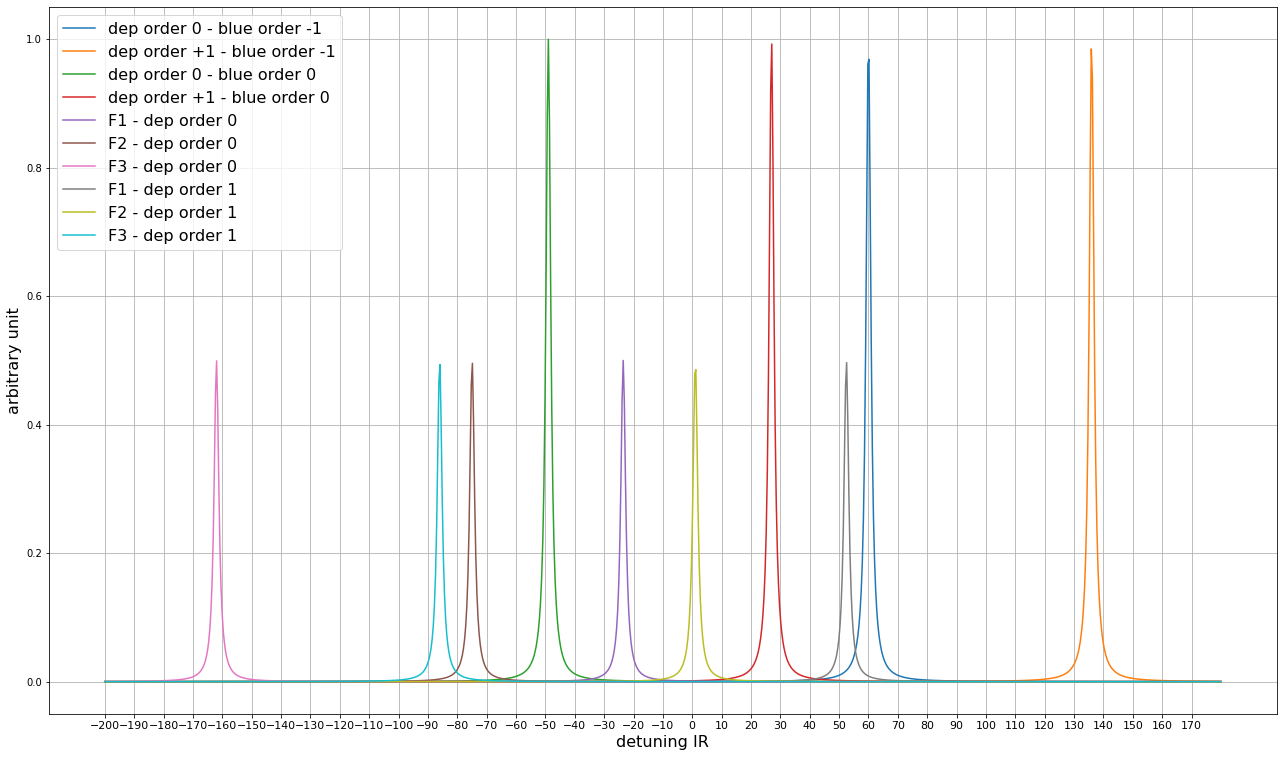

In [169]:
#### depumping

N_points = 1000
min_detuning_IR = -200
max_detuning_IR = 180
detunings = np.linspace(min_detuning_IR, max_detuning_IR, N_points)
labels = [
        "dep order 0 - blue order -1", 
        "dep order +1 - blue order -1", 
        "dep order 0 - blue order 0", 
        "dep order +1 - blue order 0",
        "F1 - dep order 0",
        "F2 - dep order 0",
        "F3 - dep order 0",
        "F1 - dep order 1",
        "F2 - dep order 1",
        "F3 - dep order 1",
]
exc_sim = {}
for label in labels:
    exc_sim[label] = []

for detuning_IR in detunings:
    # the excitation IR has the order +1 good coupled with the blue order -1.
    # the order zero of the excitation IR is x MHz higher than the order +1.

    x = 60
    exc_IR_0 = x - detuning_IR
    exc_IR_1 = - detuning_IR

    # the order zero of the depumping beam is the same of the excitation beam, 
    # since the RF sent to the AOM+1 is 80 MHz the order -1 is 80 MHz higher.

    dep_IR_0 = x - detuning_IR
    dep_IR_1 = x + 76 - detuning_IR

    # define the blue radiofrequecy

    blue_RF = 109

    blue_order_0 = blue_RF
    blue_order_1 = 0

    excitations = [
                dep_IR_0-blue_order_1, 
                dep_IR_1-blue_order_1, 
                dep_IR_0-blue_order_0, 
                dep_IR_1-blue_order_0,
                F1-dep_IR_0,
                F2-dep_IR_0,
                F3-dep_IR_0,
                F1-dep_IR_1,
                F2-dep_IR_1,
                F3-dep_IR_1,
                ]

    for label, lasers in zip(labels, excitations):
        if "F" in label:
            exc_sim[label].append(lorentian(lasers, 0.5))
        else:
            exc_sim[label].append(lorentian(lasers, 1))

plt.figure(figsize=(22,13))
for k, label in zip(range(len(exc_sim)), labels):
    plt.plot(detunings, exc_sim[label], label=label)
plt.legend(fontsize=16)
plt.xlabel("detuning IR", fontsize=16)
plt.ylabel("arbitrary unit", fontsize=16)
plt.xticks(np.arange(min_detuning_IR, max_detuning_IR, 10), fontsize=11)
plt.grid()
plt.show()


In [125]:
list(zip([2,3,4],[4,6,8]))

[(2, 4), (3, 6), (4, 8)]

In [ ]:
zip()

In [55]:
225 - F2_to_3

137.95

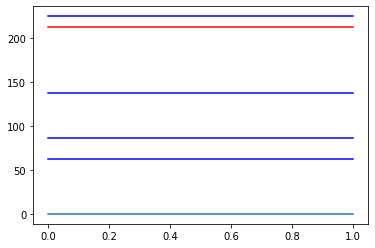

In [62]:
detuning_from_F3 = 225
F3pos = detuning_from_F3
F2pos = F3pos - F2_to_3
F1pos = F2pos - F1_to_2
F0pos = F1pos - F0_to_1
observed_peack = 213

plt.plot([0,1],[F3pos, F3pos], c = "b")
plt.plot([0,1],[F2pos, F2pos], c = "b")
plt.plot([0,1],[F1pos, F1pos], c = "b")
plt.plot([0,1],[F0pos, F0pos], c = "b")
plt.plot([0,1],[observed_peack, observed_peack], c = "r")
plt.plot([0,1],[0, 0])

plt.show()

In [51]:
(607.2-681.8)*unit_IR

-57.44126357354386

In [52]:
(+958.2-607.2)*unit_IR

270.2665350444225

In [80]:
80/unit_IR

103.8974358974359

In [44]:
(-681.8+958.2)*unit_IR

212.82527147087865

In [38]:
653.9+225/unit_blue

775.3423076923077

In [37]:
653.9+F2_to_3/unit_blue

700.8846794871795

In [34]:
700+F1_to_2/unit_blue

727.7644102564102

In [36]:
726+F0_to_1/unit_blue

738.8135128205129

In [22]:
(562-285)*unit_IR

213.28726554787758

In [23]:
15.2+34.7

49.900000000000006

In [24]:
print((206-285)*unit_IR)
print((285-364)*unit_IR)

-60.829220138203354
-60.829220138203354


In [122]:
#Code to calculate density
N=285600
R1=(103)*3.125
R2=(67)*3.125
AvR=(R1+R2)/(2*np.sqrt(2))
Volume=(4/3)*AvR*np.pi**3
print(f"The volume is: {Volume}")
D=(N/((4/3)*np.pi*(AvR*10**(-4))**3))
print(f"Density = {D}")
scientific_notation="{:e}".format(D)
print(f"Density = {scientific_notation}")
AverageR =(R1+R2)/(2*np.sqrt(2))
print(f"Radius = {AverageR}")
Int_dist=(1/D)**(1/3)
print(f"interatomic distance = {Int_dist*10**4}")

The volume is: 7765.015093745153
Density = 10289819227.757347
Density = 1.028982e+10
Radius = 187.82523875267668
interatomic distance = 4.597595421429537


In [106]:
#Code to calculate density
N=303828
R1=(116)*3.125
R2=(69)*3.125
AvR=(R1+R2)/(2*np.sqrt(2))
Volume=(4/3)*AvR*np.pi**3
print(f"The volume is: {Volume}")
D=(N/((4/3)*np.pi*(AvR*10**(-4))**3))
print(f"Density = {D}")
scientific_notation="{:e}".format(D)
print(f"Density = {scientific_notation}")
AverageR =(R1+R2)/(2*np.sqrt(2))
print(f"Radius = {AverageR}")
Int_dist=(1/D)**(1/3)
print(f"interatomic distance = {Int_dist*10**4}")

The volume is: 8450.163484369725
Density = 8493934658.499771
Density = 8.493935e+09
Radius = 204.39805393673637
interatomic distance = 4.901139095627434


In [ ]:
atoms = [22844, 18626, 19253, 19282, 18710, 40202, 38000, 46941, 47643, 50279, 49877, 49501, 50793, 51528, 52723, 51633]

In [27]:
# to excite with depumping beam
(80)/unit_IR

103.8974358974359

In [28]:
889.2 + 160/unit_IR


1096.9948717948719

In [29]:
### for the blue
F3 = 295
F2 = F3+87.05/unit_blue
F1 = F2+51.44/unit_blue
F0 = F1+23.74/unit_blue

print(f" F0 = {F0}\n", f"F1 = {F1}\n", f"F2 = {F2}\n", f"F3 = {F3}")

 F0 = 382.5626025641026
 F1 = 369.74908974358976
 F2 = 341.9846794871795
 F3 = 295


In [30]:
### for the IR
F3 = 290.2            # write here the fabry-perot resonance for the 6p F=3
F2 = F3-87.05/unit_IR
F1 = F2-51.44/unit_IR
F0 = F1-23.74/unit_IR

print(f" F0 = {F0}\n", f"F1 = {F1}\n", f"F2 = {F2}\n", f"F3 = {F3}")

 F0 = 79.50898717948716
 F1 = 110.34055128205127
 F2 = 177.14660256410255
 F3 = 290.2


In [31]:
a_aus = 2.512 # intercept fitted
b = 1.1584 # angular coefficient fitted
da = 0.0734
db = 0.126
time_fit = 1

rate = b/a_aus*1000
err = ((da/a_aus)**2+(db/b)**2)**(1/2)*(b/a_aus)*1000
print("taking as denominator the N_ions in the start: ", rate, "+-", err)

a = (a_aus + (a_aus-b*time_fit/2))/2

rate = b/a*1000
err = ((da/a)**2+(db/b)**2)**(1/2)*(b/a)*1000
print("taking as denominator the N_ions in the half: ", rate, "+-", err)


taking as denominator the N_ions in the start:  461.14649681528664 +- 51.93759056668979
taking as denominator the N_ions in the half:  521.2383009359252 +- 59.25146554456595
